# Investigating the Impact of Weather on Bird Calls

In this notebook, we aim to explore whether there is a statistically significant correlation between bird calls and weather parameters such as temperature, humidity, and solar radiation.

## Objectives

1. **Data Preprocessing**: Prepare the dataset for analysis by cleaning and normalizing the data.
2. **Exploratory Data Analysis (EDA)**: Visualize distributions and potential patterns between bird calls and weather conditions.
3. **Correlation Analysis**: Assess the statistical relationship between bird calls and weather parameters.
4. **Logistic Regression**: Model the probability of bird calls based on weather conditions and interpret the results.

## Hypothesis

1. There is a statistically significant correlation between specific sounds, like bird calls, and certain weather parameters such as temperature, humidity, and solar radiation.


Let's begin our analysis to uncover the impact of weather conditions on bird calls!


In [4]:
# get the data from the file
import pandas as pd
full_data = pd.read_csv('stats_25.04_full.csv')
full_data.head()

,datetime,precipRate,pressureMax,dewptAvg,windgustHigh,windspeedAvg,tempAve,humidityAvg,winddirAvg,uvHigh,solarRadiationHigh,BirdNET,MIT_AST_label,sound_class_label
0,2024-03-03 08:34:48,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,NaN,Bird,bird
1,2024-03-03 08:34:50,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Owl,bird
2,2024-03-03 08:34:53,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Owl,bird
3,2024-03-03 08:34:56,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Bird,bird
4,2024-03-03 08:34:59,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,NaN,Bird,bird


In [5]:
full_data.shape

(404553, 14)

In [7]:
import pandas as pd
import scipy.stats as stats

def filter_daytime_data(df):
    """
    Filters the DataFrame to include only the times between 4:00 AM and 10:00 PM.
    
    Parameters:
        df (pd.DataFrame): DataFrame with a datetime column.
    
    Returns:
        pd.DataFrame: DataFrame filtered to include only daytime data.
    """
    # Convert 'datetime' to datetime type and set as index if not already done
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        df['datetime'] = pd.to_datetime(df['datetime'])
        df.set_index('datetime', inplace=True)

    # Filter to include only times from 4:00 AM to 10:00 PM
    return df.between_time('04:00', '22:00')



In [8]:
# Filter the data to include only daytime hours
daytime_data = filter_daytime_data(full_data)

# Create a binary column for bird vocalizations detected
daytime_data['Bird_Detections'] = daytime_data['BirdNET'].notna().astype(int)

daytime_data.head()

/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_71003/150644074.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_data['Bird_Detections'] = daytime_data['BirdNET'].notna().astype(int)


,precipRate,pressureMax,dewptAvg,windgustHigh,windspeedAvg,tempAve,humidityAvg,winddirAvg,uvHigh,solarRadiationHigh,BirdNET,MIT_AST_label,sound_class_label,Bird_Detections
datetime,,,,,,,,,,,,,,
2024-03-03 08:34:48,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,NaN,Bird,bird,0
2024-03-03 08:34:50,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Owl,bird,1
2024-03-03 08:34:53,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Owl,bird,1
2024-03-03 08:34:56,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Bird,bird,1
2024-03-03 08:34:59,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,NaN,Bird,bird,0


In [9]:
daytime_data.shape

(334779, 14)

In [6]:
import pandas as pd

def datetime_to_index(data):#  already done inside filter_daytime_data()
    """
    Ensure that the DataFrame uses 'datetime' as a datetime-indexed column.
    If 'datetime' is not the index, convert it and set it as the index.

    Parameters:
        data (pd.DataFrame): DataFrame containing a 'datetime' column.

    Returns:
        pd.DataFrame: DataFrame with 'datetime' as the datetime-index.
    """
    # Check if 'datetime' is already the index and if it is a datetime type
    if not (data.index.name == 'datetime' and pd.api.types.is_datetime64_any_dtype(data.index)):
        # Check if 'datetime' column exists and is not the index
        if 'datetime' in data.columns:
            # Convert 'datetime' column to datetime type if not already
            data['datetime'] = pd.to_datetime(data['datetime'])
            # Set 'datetime' column as the index
            data.set_index('datetime', inplace=True)
        else:
            raise ValueError("DataFrame does not contain a 'datetime' column.")
    return data


I_________________________________________________________________________________________________________________I here starts the Hypothesis testing part

In [7]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import shapiro, levene


import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import shapiro, levene

def get_daily_counts_by_mean(df, feature_name, response_variable):
    """
    Groups the data by whether the feature value is above or below the daily mean.
    for each day, and computes the sum of the binary response variable for each group.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing datetime-indexed data.
        feature_name (str): Name of the feature column to analyze.
        response_variable (str): Name of the binary response variable column to test.
    
    Returns:
        2 samples series: counts_below_mean, counts_above_mean 
    """
    # Make a copy of the DataFrame to avoid modifying the original
    df=df.copy()
    # Ensure datetime is the index and is in the correct format
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        raise ValueError("Index must be datetime type")

    # Compute the daily mean of the specified feature
    daily_means = df[feature_name].groupby(df.index.date).mean()

    # Map daily means back to the data and create a binary column for above/below mean
    date_series = pd.Series(df.index.date, index=df.index)
    df['Daily_Mean'] = date_series.map(daily_means)
    df['Above_Mean'] = df[feature_name] >= df['Daily_Mean']

    # Group by date and Above_Mean status, then sum the binary response_variable
    daily_groups = df.groupby([date_series, 'Above_Mean'])[response_variable].sum()

    # Separate the counts for above and below the mean
    counts_below_mean = daily_groups.xs(False, level='Above_Mean')
    counts_above_mean = daily_groups.xs(True, level='Above_Mean')

    return counts_below_mean, counts_above_mean
    




In [21]:
from scipy import stats

def hypothesis_tests(group_below_mean, group_above_mean):
    """
    Applies normality tests, equal variance test, and performs a T-test or Mann-Whitney U test.
    Parameters:
        group_below_mean (pd.Series): Response variable counts for days below the mean.
        group_above_mean (pd.Series): Response variable counts for days above the mean.
    Returns:
        dict: Dictionary containing the test used and the resulting p-value.
    """
    # Normality Tests
    normality_below = stats.shapiro(group_below_mean).pvalue
    normality_above = stats.shapiro(group_above_mean).pvalue
    # Test for equal variances
    equal_var_test = stats.levene(group_below_mean, group_above_mean).pvalue

    print("Normality Test P-Value (Below Mean):", normality_below)
    print("Normality Test P-Value (Above Mean):", normality_above)
    print("Levene's Test P-Value for Equal Variances:", equal_var_test)

    if normality_below > 0.05 and normality_above > 0.05 and equal_var_test > 0.05:
        # T-test (parametric)
        t_stat, p_value_ttest = stats.ttest_ind(group_below_mean, group_above_mean, equal_var=True)
        test_used = 'T-test'
        p_value = p_value_ttest
    else:
        # Mann-Whitney U test (non-parametric)
        u_stat, p_value_mannwhitney = stats.mannwhitneyu(group_below_mean, group_above_mean, alternative='two-sided')
        test_used = 'Mann-Whitney U'
        p_value = p_value_mannwhitney

    print(f"{test_used} P-Value:", p_value)
    return {
        "test_used": test_used,
        "p_value": p_value
    }



How does temperature affect the frequency of bird vocalizations?

H0: "There is no difference in bird vocalizations with respect to daytime temperature."

In [12]:
# prepare 2 samples below_mean and above _mean
results = get_daily_counts_by_mean(daytime_data, 'tempAve', 'Bird_Detections')


The differences between the paired observations should follow a normal distribution. This is the primary assumption for a paired t-test that needs to be checked.

In [14]:
# check the assumptions for paired ttest
diff = results[0]-results[1]
print(len(diff))


129


In [27]:
# check for normality of the differences between paired samples
from scipy.stats import shapiro
stat, p = shapiro(diff)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

        

Statistics=0.817, p=0.000
Sample does not look Gaussian (reject H0)


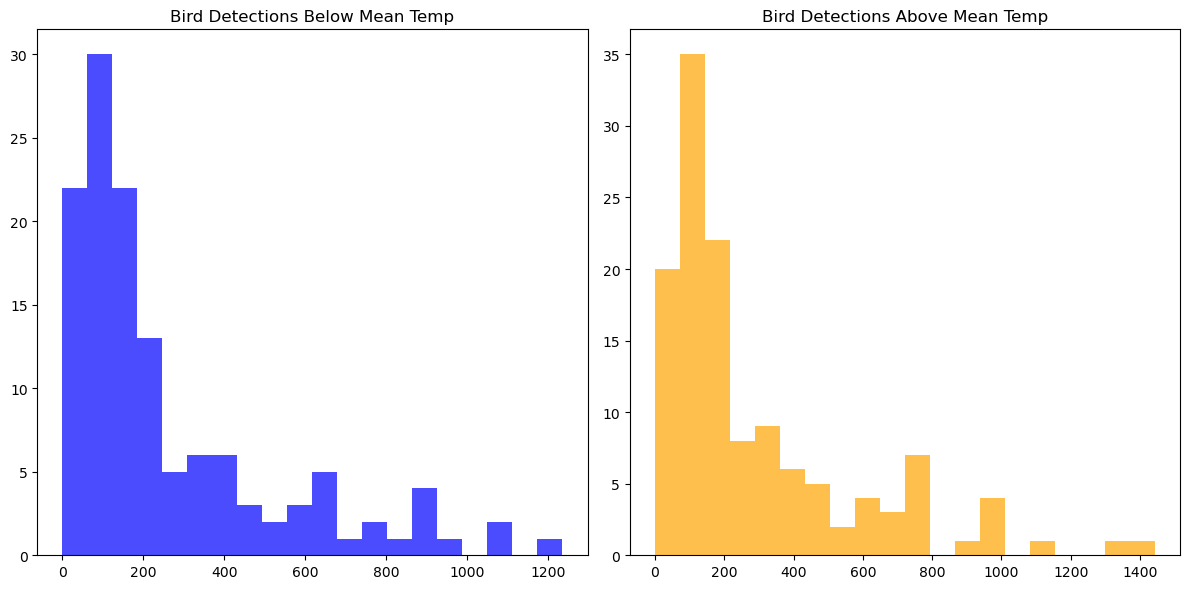

In [19]:
# plot the results histogram
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot the histogram of bird detections below the mean
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(results[0], bins=20, color='blue', alpha=0.7)
plt.title('Bird Detections Below Mean Temp')

# Plot the histogram of bird detections above the mean
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(results[1], bins=20, color='orange', alpha=0.7)
plt.title('Bird Detections Above Mean Temp')

plt.tight_layout()
plt.show()


In [22]:
hypothesis_tests(results[0], results[1])

Normality Test P-Value (Below Mean): 6.423226278387711e-12
Normality Test P-Value (Above Mean): 1.2934571858576798e-11
Levene's Test P-Value for Equal Variances: 0.5530510134196539
Mann-Whitney U P-Value: 0.24854835680349285


{'test_used': 'Mann-Whitney U', 'p_value': 0.24854835680349285}

Statistical Analysis Summary

Normality Test:

The p-values from the Shapiro-Wilk normality tests for both groups (bird vocalizations on days below and above the mean temperature) were extremely low (well below 0.05), indicating that the data for bird vocalizations do not follow a normal distribution. This deviation led to the decision to use a non-parametric test.

Levene's Test for Equal Variances:

The p-value was 0.553, suggesting that there is no significant difference in variance between bird vocalizations on days below and above the mean temperature. Although this result indicates homogeneity of variances, the non-normality of the data makes this less relevant for the choice of statistical test.

Mann-Whitney U Test:

The p-value was 0.249, which is greater than the conventional alpha level of 0.05, suggesting that there is no statistically significant difference in bird vocalizations within a day with temperatures below and above the daily mean.

Conclusion

Based on the Mann-Whitney U test, we do not reject the null hypothesis, which states that "There is no difference in bird vocalizations with respect to daytime temperature." This suggests that, within the data set analyzed, daytime temperature does not have a statistically significant impact on the frequency or occurrence of bird vocalizations.

In [72]:
# For logistic regression using statsmodels:
import statsmodels.api as sm

X = sm.add_constant(daytime_data['tempAve'])  # Adding constant for intercept
model = sm.Logit(daytime_data['Bird_Detections'], X)
result = model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.517822
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        Bird_Detections   No. Observations:               334779
Model:                          Logit   Df Residuals:                   334777
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 May 2024   Pseudo R-squ.:               0.0001512
Time:                        16:00:27   Log-Likelihood:            -1.7336e+05
converged:                       True   LL-Null:                   -1.7338e+05
Covariance Type:            nonrobust   LLR p-value:                 4.468e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2499      0.009   -139.995      0.000      -1.267      -1.232
tempAve       -0.0051      0.

In [28]:
odds_ratio = np.exp(-0.0051)
print("Odds Ratio:", odds_ratio)


Odds Ratio: 0.9949129829196596


Odds Ratio Less Than 1: An odds ratio of approximately 0.9949 indicates that higher average temperatures slightly decrease the likelihood of detecting birds. Specifically, for each unit increase in temperature, the odds of detecting birds decrease by about 0.51%


Despite the statistically significant coefficients, the very low pseudo R-squared value suggests that while the model’s predictors are statistically significant, they explain only a very small part of the variability in bird detections. This could imply that other unmodeled factors may be influencing bird detections or that the effect of temperature, while real, is quite small.

We can test generic hypothesis of type, H0: "There is no difference in bird vocalizations with respect to 'any weather feature'."

Let's test next hypothesis.

H0: "There is no difference in bird vocalizations with respect to ultraviolet (UV) radiation levels ."

In [29]:
# t_test for UVHigh feature
results_uv = get_daily_counts_by_mean(daytime_data, 'uvHigh', 'Bird_Detections')
hypothesis_tests(results_uv[0], results_uv[1])

Normality Test P-Value (Below Mean): 1.0179041595999189e-09
Normality Test P-Value (Above Mean): 9.025395181705576e-14
Levene's Test P-Value for Equal Variances: 0.0027536064930205237
Mann-Whitney U P-Value: 1.4727186696929412e-09


{'test_used': 'Mann-Whitney U', 'p_value': 1.4727186696929412e-09}



The statistical analysis conducted on the relationship between high UV levels (uvHigh) and bird detections (Bird_Detections) using data from daytime_data yielded significant findings. 

The normality tests for data subsets below and above the mean UV levels returned extremely low p-values 1.018 × 10<sup>-9</sup> and 9.025 × 10<sup>-14</sup>, respectively
, indicating that the data does not follow a normal distribution. 
 
 This was further supported by the outcome of Levene's test for equal variances, which also indicated significant differences in variances between the two groups (p-value = 0.00275).

Given these violations of the assumptions required for parametric tests, the Mann-Whitney U test, a non-parametric alternative, was employed. The test revealed a statistically significant difference in bird detections between parts of a day with low and high UV levels, with a p-value of 
1.473 × 10<sup>-9</sup>. 

This suggests that UV levels potentially have a substantial impact on bird activity.

/Users/evgenynazarenko/anaconda3/envs/thesis/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


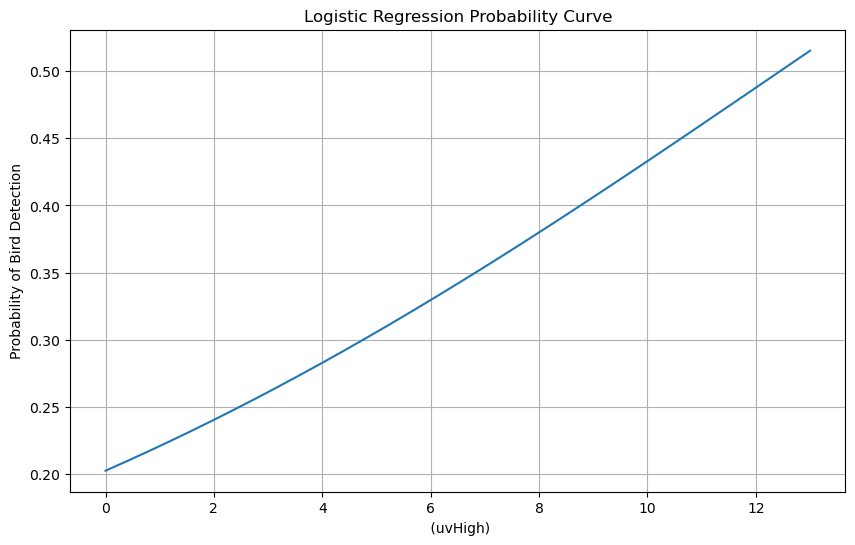

In [30]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Fit logistic regression
X = daytime_data[['uvHigh']]  # Predictor
y = daytime_data['Bird_Detections']  # Response

model = LogisticRegression()
model.fit(X, y)

# Generate temperature values for prediction
temp_range = np.linspace(daytime_data['uvHigh'].min(), daytime_data['uvHigh'].max(), 300)
probabilities = model.predict_proba(temp_range.reshape(-1, 1))[:, 1]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(temp_range, probabilities)
plt.title('Logistic Regression Probability Curve')
plt.xlabel(' (uvHigh)')
plt.ylabel('Probability of Bird Detection')
plt.grid(True)
plt.show()


In [31]:
# If using a statistical model, you can often get confidence intervals directly from the model output.
# For logistic regression using statsmodels:
import statsmodels.api as sm

X = sm.add_constant(daytime_data['uvHigh'])  # Adding constant for intercept
model = sm.Logit(daytime_data['Bird_Detections'], X)
result = model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.516237
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        Bird_Detections   No. Observations:               334779
Model:                          Logit   Df Residuals:                   334777
Method:                           MLE   Df Model:                            1
Date:                Wed, 12 Jun 2024   Pseudo R-squ.:                0.003213
Time:                        16:07:41   Log-Likelihood:            -1.7283e+05
converged:                       True   LL-Null:                   -1.7338e+05
Covariance Type:            nonrobust   LLR p-value:                3.018e-244
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3715      0.005   -292.424      0.000      -1.381      -1.362
uvHigh         0.1102      0.

In [32]:
odds_ratio = np.exp(0.1102)
print("Odds Ratio:", odds_ratio)


Odds Ratio: 1.116501348400013


An odds ratio of approximately 1.116 indicates that for each unit increase in uvHigh, the odds of detecting birds increase by a factor of about 1.116. 

This means that higher UV levels slightly increase the likelihood of bird detections.

Given the significant relationship and relatively stronger pseudo R-squared, UV index appears to be a more impactful predictor of bird detections than temperature.
 
This suggests potential biological or environmental mechanisms where UV light might influence bird activity or the detectability of birds (perhaps due to behavioral changes in birds under different sunlight conditions).



We can test generic hypothesis of type, H0: "There is no difference in bird vocalizations with respect to 'any weather feature'."

Let's test next hypothesis.

H0: "There is no difference in bird vocalizations with respect to solar radiation levels ."

We can test generic hypothesis of type, H0: "There is no difference in bird vocalizations with respect to 'any weather feature'."

Let's test next hypothesis.

H0: "There is no difference in bird vocalizations with respect to solar radiation levels ."

In [33]:
# t_test for 'solarRadiationHigh' feature
results_uv = get_daily_counts_by_mean(daytime_data, 'solarRadiationHigh', 'Bird_Detections')
hypothesis_tests(results_uv[0], results_uv[1])



Normality Test P-Value (Below Mean): 1.9943791989874948e-12
Normality Test P-Value (Above Mean): 8.628053930130852e-11
Levene's Test P-Value for Equal Variances: 0.9842347043415416
Mann-Whitney U P-Value: 0.32991272139857786


{'test_used': 'Mann-Whitney U', 'p_value': 0.32991272139857786}

The analysis aimed to explore the effects of high solar radiation levels on bird detections using the dataset daytime_data. Statistical tests were conducted to examine the distribution and variance of the data as well as to compare bird detection rates on days with different levels of solar radiation.

Normality Tests:

Below Mean Solar Radiation: The p-value is extremely low 1.994 × 10<sup>-12</sup>
, indicating that the data significantly deviates from a normal distribution.

Above Mean Solar Radiation: Similarly, this subset of the data also significantly deviates from normality, with a p-value of 8.628 × 10<sup>-11</sup>.

These results suggest that the data for bird detections under varying levels of solar radiation is not normally distributed, which is a key assumption for many parametric tests.

Levene's Test for Equal Variances:

The p-value of 0.984 suggests that there is no significant difference in the variances of bird detections between  parts of the day with lower and higher solar radiation levels. This indicates homogeneity of variances across these groups.

Mann-Whitney U Test:

Unlike the normality and variance tests, the Mann-Whitney U test (a non-parametric test used due to the failure to meet normality assumptions) did not indicate a significant difference in bird detections between days with low and high solar radiation levels (p-value = 0.3299).

These findings imply that high solar radiation does not significantly affect bird detection rates, as indicated by the non-significant result of the Mann-Whitney U test. This conclusion is consistent regardless of the data’s failure to meet the normality assumption, thanks to the use of an appropriate non-parametric test.

We can test generic hypothesis of type, H0: "There is no difference in bird vocalizations with respect to 'any weather feature'."

Let's test next hypothesis.

H0: "There is no difference in bird vocalizations with respect to maximum pressure recorded ."

In [34]:
# t_test for pressureMax feature
results_uv = get_daily_counts_by_mean(daytime_data, 'pressureMax', 'Bird_Detections')
hypothesis_tests(results_uv[0], results_uv[1])





Normality Test P-Value (Below Mean): 1.626718577243686e-12
Normality Test P-Value (Above Mean): 4.0584688201621695e-12
Levene's Test P-Value for Equal Variances: 0.07244413357633205
Mann-Whitney U P-Value: 0.08521017245602255


{'test_used': 'Mann-Whitney U', 'p_value': 0.08521017245602255}

Normality Tests:

Below Mean Pressure: 

The p-value 1.627 × 10<sup>-12</sup> indicates a significant deviation from a normal distribution.

Above Mean Pressure: This subset also shows a significant deviation from normality, with a p-value of 
4.058 × 10<sup>-12</sup>.

These results suggest that the data for bird detections under different atmospheric pressure conditions do not follow a normal distribution, which is crucial for many parametric tests.

Levene’s Test for Equal Variances:

The p-value of 0.0724, although not below the common alpha threshold of 0.05, suggests a marginal situation where variance homogeneity might not be fully assured. This raises a slight concern over using tests that assume equal variances.

Mann-Whitney U Test:

The Mann-Whitney U test yields a p-value of 0.0852, which is above the conventional alpha level of 0.05 but indicates a marginal difference between bird detections during days with lower versus higher maximum pressure. This result points to a potential but not statistically significant impact of atmospheric pressure on bird detection rates.

These findings indicate that while there is a slight indication of differing bird detection rates with changes in atmospheric pressure, the differences are not statistically significant. This suggests that maximum pressure alone may not be a strong predictor of bird detection variability. Future research might explore more complex models that include multiple environmental variables or different analytical approaches to further investigate this relationship

                         PC1       PC2
precipRate         -0.170746  0.554904
pressureMax         0.116086 -0.727429
dewptAvg            0.680847  0.605202
tempAve             0.868825  0.371857
humidityAvg        -0.673724  0.406651
solarRadiationHigh  0.907563 -0.166200
uvHigh              0.900351 -0.145642


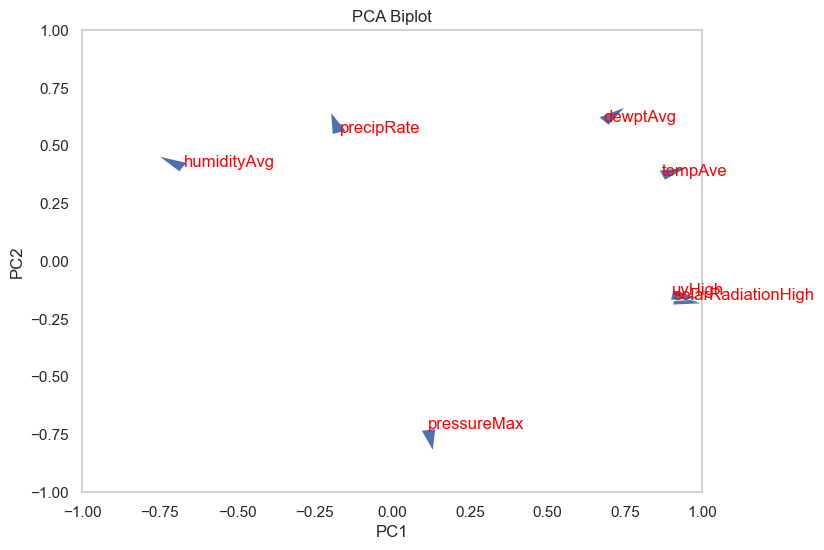

In [208]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Example DataFrame
data = daytime_data[['precipRate', 'pressureMax', 'dewptAvg', 'tempAve', 'humidityAvg','solarRadiationHigh','uvHigh']]

# Standardizing the Data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Applying PCA
pca = PCA(n_components=2)  # adjust components as needed
principalComponents = pca.fit_transform(data_scaled)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Creating a DataFrame for Loadings
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=data.columns)
print(loadings_df)

# Optional: Plotting a Biplot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for i, v in enumerate(loadings_df.values):
    plt.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1)
    plt.text(v[0], v[1], loadings_df.index[i], color='red')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Biplot')
plt.grid()
plt.show()


Principal Component 1 (PC1)

tempAve (0.868825) and solarRadiationHigh (0.907563): These have strong positive loadings on PC1, indicating that they are the primary contributors to this component. This suggests that PC1 could represent a factor related to temperature and solar radiation, perhaps an overall "warmth" or "sunlight exposure" factor.

uvHigh (0.900351): Similar to solarRadiationHigh, also shows a strong positive correlation with PC1, further supporting the "sunlight exposure" interpretation.

humidityAvg (-0.673724): Shows a strong negative loading, suggesting that as humidity decreases, the values of PC1 increase, reinforcing the idea that PC1 represents drier, sunnier conditions.

dewptAvg (0.680847): Positively correlated with PC1, indicating that higher dew points (which typically correspond to warmer air able to hold more moisture) also contribute to this component, aligning it somewhat with temperature.

Principal Component 2 (PC2)

pressureMax (-0.727429): This has a strong negative loading on PC2, implying that this component decreases as pressure increases, potentially representing atmospheric stability or high-pressure conditions.

precipRate (0.554904) and humidityAvg (0.406651): Both show positive loadings, though precipRate more so, suggesting PC2 could be capturing aspects of moisture and precipitation.

dewptAvg (0.605202): Also has a significant positive loading, aligning with the interpretation that PC2 is related to moisture (since dew point is a direct measure of atmospheric moisture).

tempAve (0.371857): Shows a moderate positive loading, indicating that it contributes to PC2, but it is more dominant in PC1.

Interpreting the Components Together:

PC1 seems to capture a climatic factor characterized by higher temperatures, high solar radiation, and low humidity, which might be indicative of sunny, clear weather conditions.

PC2 appears to represent variations in atmospheric pressure and moisture, possibly capturing different weather conditions related to changes in precipitation or humidity levels.

These interpretations are consistent with the physical meanings of these meteorological variables:

Higher temperatures and solar radiation typically occur on clear days.
Higher dew points indicate more moisture in the air.
Lower atmospheric pressures often accompany deteriorating weather conditions, potentially leading to increased precipitation.

In [209]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio for PC1 and PC2:", explained_variance_ratio)
print("Total variance explained by PC1 and PC2:", sum(explained_variance_ratio))

Explained variance ratio for PC1 and PC2: [0.47846207 0.22225887]
Total variance explained by PC1 and PC2: 0.70072093462937


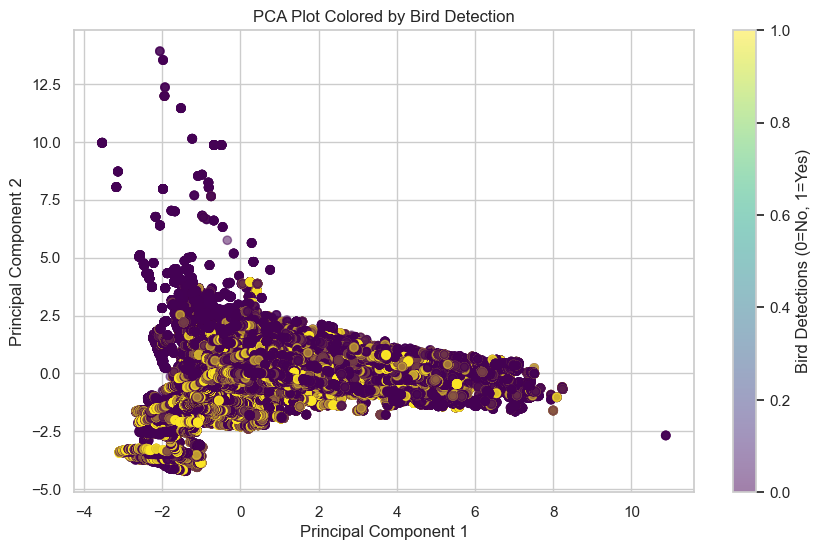

In [210]:
import matplotlib.pyplot as plt

# Assuming 'principalComponents' contains the PCA results and 'bird_detection' is your target variable.
plt.figure(figsize=(10, 6))
scatter = plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=daytime_data['Bird_Detections'], cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Bird Detections (0=No, 1=Yes)')
plt.title('PCA Plot Colored by Bird Detection')
plt.show()


General Observations

Data Distribution:
The data points are primarily spread along Principal Component 1 (PC1), indicating that this component captures the most significant variation in the dataset. PC1 spans a wide range of values, suggesting it reflects a critical underlying factor or combination of factors influencing bird detection.

Principal Component 2 (PC2) also shows some variation but is much more constrained compared to PC1.

Detection Coloring:

The yellow points (indicating bird detections, value '1') are predominantly found concentrated towards the center of the PC1 axis and closer to zero on the PC2 axis.
The majority of the plot, particularly along the central horizontal alignment of PC1, shows a gradient transition from purple to yellow, indicating a mix of non-detections and detections.
Higher PC2 values, particularly in the region above 2.5, appear mostly purple, indicating non-detections.

Specific Insights

Clusters and Patterns:
There is a distinct cluster of non-detections at higher values of PC2 (above 5), which suggests that whatever variation PC2 is capturing, it correlates negatively with the likelihood of detecting birds when at extreme values.

Bird detections are somewhat scattered but are most concentrated around the middle range of PC1 with lower values of PC2.

Principal Component Analysis:

PC1: Since this component has the broadest spread and bird detections are mainly concentrated in its midrange, PC1 likely captures significant environmental or observational factors that are optimally aligned (neither too high nor too low) to increase the likelihood of detecting birds.

PC2: The variation captured by PC2 seems to be less directly related to bird detections but may represent conditions that, particularly at extreme values, reduce the likelihood of detection.

In [212]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Logistic regression to see how well PCs predict bird detection
model = LogisticRegression()
model.fit(principalComponents, daytime_data['Bird_Detections'])

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficients for PC1, PC2:", model.coef_)


Intercept: [-1.34297]
Coefficients for PC1, PC2: [[ 0.06697021 -0.27301278]]


Model Output Interpretation

Intercept (\beta_0\)

The model's intercept is \(-1.34297\). In logistic regression, the intercept represents the log-odds of detecting a bird when all the predictors (principal components in this case) are zero. 


This suggests that in the absence of any effects from the principal components (when PCs are at mean or zero standardized value), the probability of detecting a bird is about 20.7%.

Coefficients for PC1 and PC2

- PC1 (\beta_1\) = 0.06697021: This coefficient is positive, indicating that higher values of PC1 increase the log-odds of detecting a bird, albeit the impact is relatively small. This means as PC1 increases, so does the probability of detecting a bird, suggesting that whatever composite factor PC1 represents (possibly related to environmental conditions like temperature or solar exposure if those loaded heavily on PC1), it is slightly favorable to bird detection.

- PC2 (\beta_2\) = -0.27301278: This coefficient is negative and larger in magnitude than the coefficient for PC1, indicating a stronger influence on the probability of detecting a bird. A negative coefficient means that as PC2 increases, the log-odds of detecting a bird decrease. This could suggest that the factors heavily contributing to PC2 might be conditions or observations that are less conducive to bird detection, or possibly even deterrents.



This model offers a quantitative way to link complex, multivariate environmental data (reduced to principal components) with the likelihood of detecting birds, enhancing both understanding and decision-making in ecological studies or similar applications.


Principal Components Analysis with 3 PC.

Explained variance ratio for PC1, PC2, and PC3: [0.47846207 0.22225887 0.12328235]
Total variance explained by the first three PCs: 0.824003284773887
Loadings:
                          PC1       PC2       PC3
precipRate         -0.170746  0.554904  0.790300
pressureMax         0.116086 -0.727429  0.150920
dewptAvg            0.680847  0.605202 -0.260069
tempAve             0.868825  0.371857 -0.193101
humidityAvg        -0.673724  0.406651 -0.068662
solarRadiationHigh  0.907563 -0.166200  0.223949
uvHigh              0.900351 -0.145642  0.236299


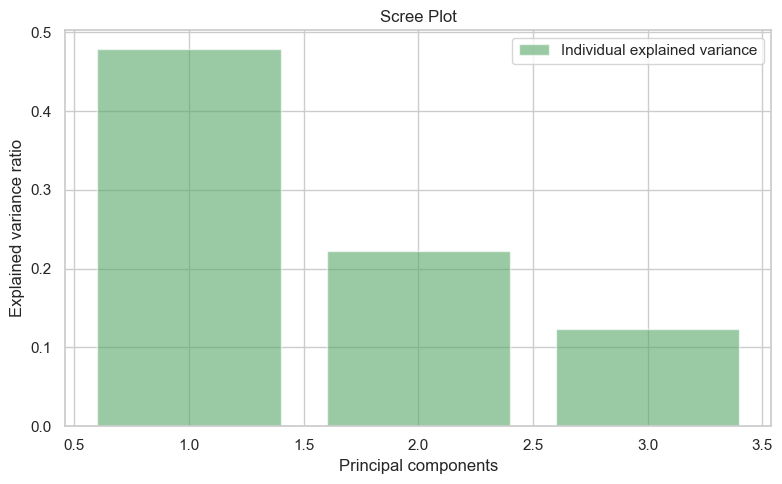

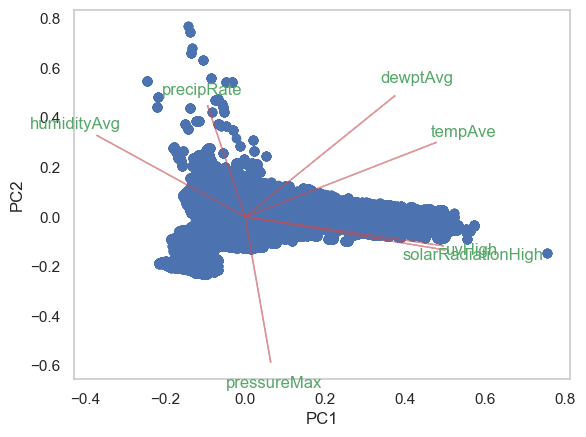

In [203]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Sample data
data = daytime_data[['precipRate', 'pressureMax', 'dewptAvg', 'tempAve', 'humidityAvg','solarRadiationHigh','uvHigh']]
# Standardizing the data (important for PCA to perform correctly)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Applying PCA with 3 components
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data_scaled)

# Creating a DataFrame with the principal components
principal_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio for PC1, PC2, and PC3:", explained_variance_ratio)
print("Total variance explained by the first three PCs:", sum(explained_variance_ratio))

# Loadings (or weights) of the original features for each principal component
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=data.columns)
print("Loadings:\n", loadings_df)

# Optional: Plotting a Scree Plot
plt.figure(figsize=(8, 5))
plt.bar(range(1, 4), explained_variance_ratio, alpha=0.6, color='g', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.tight_layout()  # This adjusts subplot params for the figure
plt.show()
# Optional: Biplot
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c='b')
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

# Call the biplot function if needed
biplot(principalComponents[:, :2], np.transpose(pca.components_[0:2, :]), labels=data.columns)
plt.show()


Analysis of Directions and Correlations

tempAve and solarRadiationHigh: Both vectors point in a similar direction along the positive side of PC1, suggesting that these variables are positively correlated with each other and strongly influence PC1. This indicates that higher values of temperature and solar radiation are associated with higher scores in PC1.

humidityAvg, precipRate, and dewptAvg: These vectors primarily have a positive orientation along PC2, indicating that increases in these variables correspond to higher values in PC2. It suggests that these variables, which are related to moisture, define much of the variability in PC2.

pressureMax: This vector points towards the negative side of PC2, suggesting an inverse relationship with the variables associated with moisture, such as humidity and precipitation. This implies that higher pressure is correlated with lower scores in PC2, aligning with lower moisture conditions.

Interpreting the Data Points Distribution

The distribution of data points primarily along PC1 and slightly along PC2 suggests variability in the dataset along these dimensions. Observations further along the positive side of PC1 are likely associated with higher temperatures and solar radiation, while those along the positive side of PC2 may be associated with higher moisture conditions.

Conclusion

This biplot is valuable for visually assessing the relationships between variables and the principal components, as well as understanding the dataset's structure in a reduced-dimensional space. It helps in identifying patterns, correlations, and potential outliers, which can be crucial for further analysis and modeling efforts.

Explained Variance Ratio

PC1: 47.85% - This component explains nearly half of the variance in your data, indicating it captures a significant amount of the information.

PC2: 22.23% - The second component still contributes a considerable amount, though less than half compared to PC1.

PC3: 12.33% - This component adds to the explanation, contributing over a tenth of the total variance.

Total: 82.40% - Together, the first three components explain about 82.40% of the variance in your data, which suggests that they capture most of the critical information, though some details are still held in the remaining components.

Interpretation of Loadings

Principal Component 1 (PC1):

Dominated by tempAve, solarRadiationHigh, and uvHigh with high positive loadings, suggesting that this component is strongly associated with factors related to temperature and solar radiation. This might be interpreted as an overall "environmental energy" factor where both temperature and solar input are high.
humidityAvg has a strong negative loading, indicating that this component also captures an inverse relationship with humidity (as temperature and solar radiation increase, humidity decreases).

Principal Component 2 (PC2):

pressureMax shows a strong negative loading, and precipRate, dewptAvg, and humidityAvg show positive loadings. This component may represent an atmospheric moisture component, where high pressure correlates with low moisture and vice versa. High moisture levels, as indicated by precipitation, dew point, and humidity, are associated positively.

Principal Component 3 (PC3):

Dominated positively by precipRate and somewhat by solarRadiationHigh and uvHigh, suggesting a component that may relate to weather conditions conducive to precipitation and slightly influenced by solar factors.
dewptAvg, tempAve, and notably pressureMax show minor negative contributions, indicating a possible slight inverse relationship with these features during events of higher precipitation.

Summary

PC1 could be viewed as the "climatic energy" component, capturing variations primarily associated with temperature and radiation and inversely related to humidity.

PC2 might represent an "atmospheric moisture" component, emphasizing the balance between atmospheric pressure and moisture content.

PC3 seems to reflect specific conditions that favor precipitation, possibly during particular weather scenarios influenced by solar and UV conditions.

Each principal component captures different aspects of the climatic and atmospheric data, providing a multi-faceted insight into the dataset's variance structure. These insights can be particularly valuable in modeling climate-related phenomena or in understanding environmental data distributions.